# 🪨✂️📜 EXP01. 가위바위보 분류기 만들기 

# 목차

### [프로젝트를 시작하며](#프로젝트를-시작하며)  
### [1. 데이터 준비하기](#1.-데이터-준비하기) 

    1. 학습용 데이터 수집하기
    2. 디렉토리 만들기  
    3. 데이터 가공하기 - Resize  
    4. 클래스 라벨링 하기   
    
### [2. 딥러닝 네트워크 설계하기](#2.-딥러닝-네트워크-설계하기)  
### [3. 모델 학습하기](#3.-모델-학습하기)  
### [4. 만든 모델 검증 해 보기](#4.-만든-모델-검증-해-보기)
### [5. 모델 개선하기 - 정확도 60% 이상을 향해!](#5.-모델-개선하기)
### [후기](#후기)   


----

# 프로젝트를 시작하며

- AIFFEL 과정의 첫 프로젝트이다. 처음 접하는 내용 뿐이라 어려움도 많지만,   LMS 내용과 구글링을 통해 열심히 해 보려한다!
- 이번 프로젝트에서는 가위바위보 분류기를 만들어 본다. 가위, 바위, 보 에 대한 사진을 직접 찍어서 데이터로 만들어 보고, 모델을 만들어 학습 한 후, 다양한 다른 사람의 손 데이터를 가져와 모델의 성능을 테스트해 볼 것이다.
- 데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가) 의 순서를 따라가 보며 가위바위보 분류기를 만들어 보자!

-----

# 1. 데이터 준비하기

## 1. 학습용 데이터 수집하기 
- 모델 학습에 필요한 데이터는 내 손으로 가위, 바위, 보 각각 100 장의 사진을 찍어서 준비하였다.

[Teachable Machine](https://teachablemachine.withgoogle.com/)

- 구글에서 제공하는 머신러닝 학습 도구 페이지를 이용해 데이터를 수집하였다.
- 딥러닝 모델이 인식하기 좋게끔 여러 각도와 여러 크기로 촬영한다.
    - 대상 사진을 찍어 다운로드 후, 사진 파일을 분류 후 이름을 수정해 주었다. 
        - 모델 학습용 데이터는 정확할 수록 학습하기 쉬워, 학습하기 좋은 데이터로 정리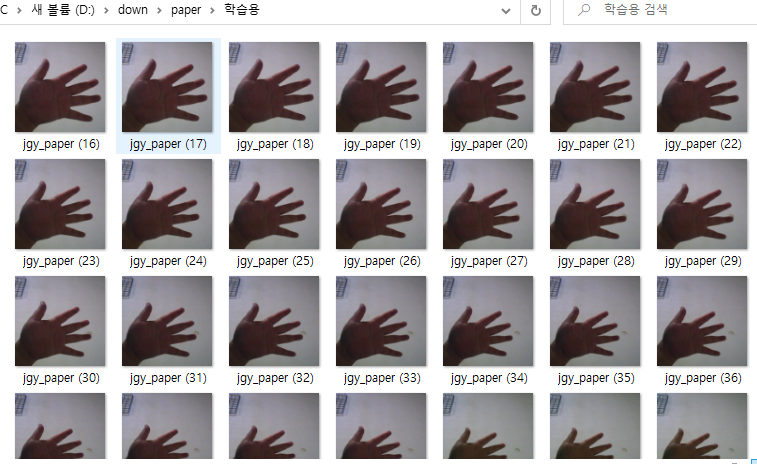
        - Teachable Machine 으로 데이터 파일을 저장하게되면, 정수로 나오기 때문에 다른 팀원들과 이름이 겹치므로, 정보를 사용하기 좋게끔 이름을 변경하였다. 
        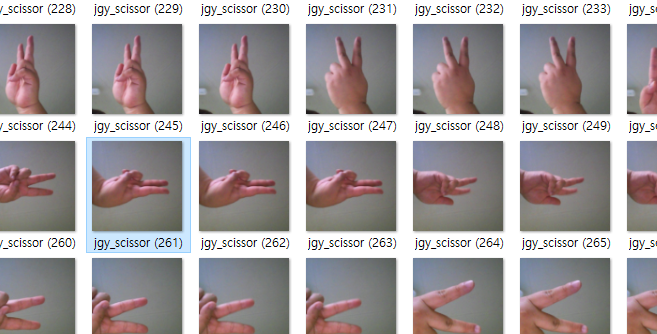 * 가위로 인식하기 미묘한 사진은 삭제했다.

----

## 2. 디렉토리 만들기 
- Cloud shell 을 이용해, 학습용 데이터를 넣을 폴더를 만들어준다.
- ls 명령어로 폴더가 잘 만들어졌는지 확인도 해 보았다.

In [1]:
# $ mkdir -p ~/aiffel/rock_scissor_paper/scissor
# $ mkdir -p ~/aiffel/rock_scissor_paper/rock
# $ mkdir -p ~/aiffel/rock_scissor_paper/paper

# $ ls -l ~/aiffel/rock_scissor_paper 

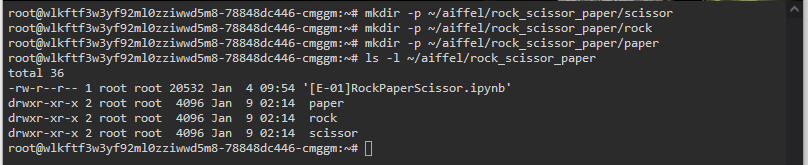
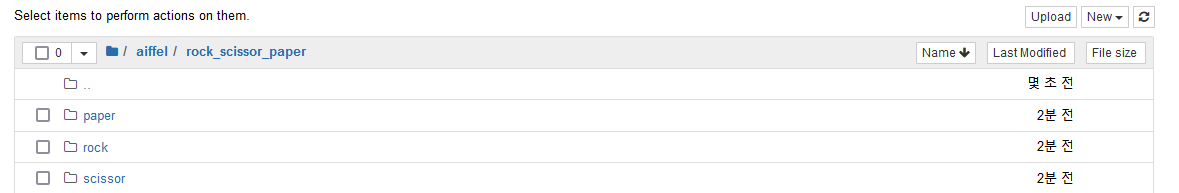
- 분류한 데이터를 zip 파일로 압축해, Shell에서 만들었던 디렉토리 안에 각각 넣어주고, shell 에서 압축을 풀어준다.

-----------------------------

## 3. 데이터 가공하기 - Resize 

- Teachable Mechine 에서 만든 데이터는 224x224 사이즈의 컬러 사진이다.
- mnist 데이터셋 에서 손글씨 데이터는 **28X28** 픽셀의 **1채널 이미지(흑백)**으로 표준화 해 주었다. 
- 가위,바위,보 이미지도 이에 맞게 **28x28 픽셀**로 맞춰주되, 흑백(1채널) 이 아닌 컬러(3채널) 로 설정하여 사이즈를 Resize 해 줘야 한다.

In [68]:
# 필요한 모듈 불러오기
import os,glob
from PIL import Image

# 이미지를 Resize 해 줄 함수 만들기. 
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  # img_path 안에 있는 .jpg 로 끝나는 파일. 
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img) # 이미지 파일 하나를 가져와서,
		new_img=old_img.resize(target_size,Image.ANTIALIAS) #지정한 사이즈로 바꾼 후
		new_img.save(img, "JPEG") #jpeg 형식의 파일로 저장
    
	print(len(images), " images resized.")

* 모듈을 가져와 함수를 만들었으니, 만든 폴더 내 데이터를 Resize 해 주자!

In [111]:
# 가위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")
print('-'*30)

# 바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")
print('-'*30)
# 보

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")



1100  images to be resized.
1100  images resized.
가위 이미지 resize 완료!
------------------------------
1100  images to be resized.
1100  images resized.
바위 이미지 resize 완료!
------------------------------
1100  images to be resized.
1100  images resized.
보 이미지 resize 완료!


## 4. 클래스 라벨링 하기 

* 아직 함수를 만들만한 실력이 되지 않아, LMS에서 만들어주신 함수를 이용하여 라벨링 해 주었다. 코드를 직접 짜진 못 했지만, 코드를 보면서 어떤 기능 일지를 주석으로 달아보았다. 
* 어떤 그림이 가위인지, 바위인지, 보 인지를 구분해 주기 위해서 클래스 라벨링을 해 주는데, 가위:0, 바위:1, 보:2 로 라벨링 해 주었다. 

In [112]:
# 필요한 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt

#load_data 함수 만들기. 
def load_data(img_path, number_of_data=3300): #img_path 와 data 갯수를 기입. 
    # rock_scissor_paper 폴더 안에 있는 데이터 갯수를 기입. 
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28 #28*28 픽셀
    color=3 #데이터는 RGB, 3차원 데이터 이기 때문에 
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'): 
        # 입력 받은 경로 + rock 폴더 안의 .jpg 파일
        img = np.array(Image.open(file),dtype=np.int32) # 가져온 한 파일의 이미지 행렬 
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0 , 0으로 라벨링 
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'): 
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper" 
# 경로를 rock_scissor_paper 로 설정. 
(x_train, y_train)=load_data(image_dir_path)  
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


라벨:  0


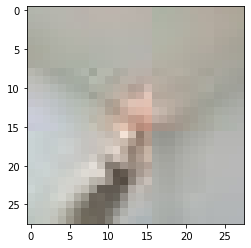

In [113]:
# 이미지를 불러와서 잘 됬는지 확인 해 보자! 
plt.imshow(x_train[50])
print('라벨: ', y_train[50])

* 설정 한 대로 이미지와 라벨링이 잘 된것을 확인할 수 있다. 

----

# 2. 딥러닝 네트워크 설계하기

* 텐서플로우 케라스(tf.keras) 에서 Sequential API를 이용해 딥러닝 네트워크를 설계해보자.

* MINST 손글씨 데이터와 지금 우리가 만들어 볼 가위바위보 데이터는 다른점이 있는데,  

    1. MINST 손글씨 데이터는 흑백 이미지, 즉 1차원이지만, 학습 데이터로 찍은 손 이미지들은 전부 컬러이미지 이기 때문에 rgb 3차원 데이터이다. 
    2. 손글씨 데이터의 클래스는 0~9 총 10개 였지만, 가위바위보는 3가지 밖에 없기 때문에, 클래스는 0,1,2 총 3개다. 

* 위에 적은 다른 점을 고려해서 모델을 만들어보자! 

In [156]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=32 # 사용하는 이미지 특징의 수
n_channel_2=64
n_dense=64 #분류기에 사용되는 뉴런의 숫자
n_train_epoch=12 # 학습 반복 횟수 

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# input_shape=(28,28,3) 의 채널 값은 1이 아니라 3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 10이 아니라 3으로 변경

model.summary() #딥러닝 네트워크 모델을 확인 


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_50 (Dense)             (None, 3)               

# 3. 모델 학습하기 

* 2번에서 만든 모델을 학습데이터로 학습 해 보자! 

In [165]:
#모델 컴파일 - fit 함수로 학습하기 위해 해 주는 처리. 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#모델 학습 
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/12
104/104 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9921
Epoch 2/12
104/104 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 3/12
104/104 [==============================] - 0s 3ms/step - loss: 3.0585e-04 - accuracy: 1.0000
Epoch 4/12
104/104 [==============================] - 0s 3ms/step - loss: 3.2796e-05 - accuracy: 1.0000
Epoch 5/12
104/104 [==============================] - 0s 3ms/step - loss: 1.1076e-05 - accuracy: 1.0000
Epoch 6/12
104/104 [==============================] - 0s 3ms/step - loss: 1.0492e-05 - accuracy: 1.0000
Epoch 7/12
104/104 [==============================] - 0s 3ms/step - loss: 8.3215e-06 - accuracy: 1.0000
Epoch 8/12
104/104 [==============================] - 0s 3ms/step - loss: 6.8133e-06 - accuracy: 1.0000
Epoch 9/12
104/104 [==============================] - 0s 3ms/step - loss: 5.8171e-06 - accuracy: 1.0000
Epoch 10/12
104/104 [==============================] - 0s 3ms/step - los

# 4. 만든 모델 검증 해 보기
* 만든 모델의 성능을 검증 해 보자. 검증을 위해 추가로 600장의 다른 팀원의 데이터를 가져와 압축을 풀어 resize 하여 검증 해보자.  

## 1. 테스트 데이터 준비하기 

* 검증용 데이터 이므로, Rock_scissor_Paper 폴더 안에 test라는 폴더를 만들어 데이터를 가져와 넣어주었고, 28x28 사이즈로 resize, 라벨링 하였다.

In [121]:
#test 데이터 resize 

# 가위 
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
print('-'*30)
# 바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")
print('-'*30)
# 보 

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
print('-'*30)

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
------------------------------
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
------------------------------
200  images to be resized.
200  images resized.
보 이미지 resize 완료!
------------------------------


In [167]:
# 라벨링

#load_tdata 함수 만들기. 
#테스트 데이터용으로 함수 이름, 데이터 갯수 변경 
def load_tdata(img_path, number_of_data=600): #img_path 와 data 갯수를 기입. 
    # rock_scissor_paper 폴더 안에 있는 데이터 갯수를 기입. (각 200장, 총 600장 )
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28 #28*28 픽셀
    color=3 #데이터는 RGB, 3차원 데이터 이기 때문에 
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'): 
        # 입력 받은 경로 + rock 폴더 안의 .jpg 파일
        img = np.array(Image.open(file),dtype=np.int32) # 가져온 한 파일의 이미지 행렬 
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0 , 0으로 라벨링 
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'): 
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test" 
# 경로를 rock_scissor_paper/test 로 설정. 
(x_test, y_test)=load_tdata(image_dir_path)  
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


## 2. 모델 검증하기 

* 위에서 만든 모델을 시험해 보고, 정확도를 확인 해 보자! 

In [168]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 [==============================] - 0s 2ms/step - loss: 4.2535 - accuracy: 0.6350
test_loss: 4.253520965576172 
test_accuracy: 0.6349999904632568


-----

# 5. 모델 개선하기

## 1. 하이퍼 파라미터 바꾸기 
* EXP 01 - 6 노드에서, 구조는 바꾸지 않으면서 인식률을 높혀보는 방법으로 파라미터를 바꿔보기를 제시했었다. 
* plt 모듈로 출력 했을 때, 육안으로 보기에도 확인하기 어려웠으니 파라미터를 바꿔, 모델이 학습하기 좋게 해 보려한다.  

* 변경 전 기본값 및 정확도 (data 수 : 300개) 
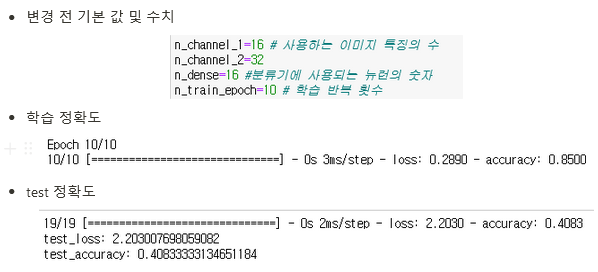

### 1. 하이퍼 파라미터 변경하기 
####  1-1. channel_1,2값만 32, 64 로 바꿨을 경우

- 정확도가 0.3333 에서 더 늘어나지 않는다. ⇒ 폐기

#### 1-2 dense 값만 32로 바꿨을 경우 
*- 학습 정확도
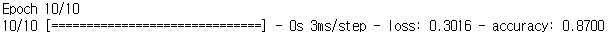

- test 정확도
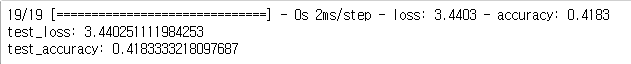
⇒ 정확도가 1% 올랐다.  조금 더 복잡한 뉴런이 되었으니, 학습 횟수가 늘어나면 좀 더 정확하게 판단할 수 있지 않을까?

#### 1-3 dense = 32, epoch = 20 으로 바꿨을 경우
* 학습 정확도 
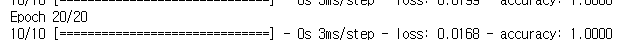
- test 정확도
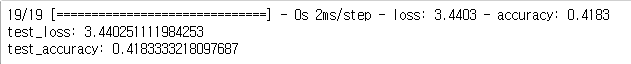

#### 1-4 epoch 만 = 20으로 바꿨을 경우. (dense 16)
* 학습 정확도 
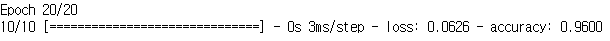
* test 정확도
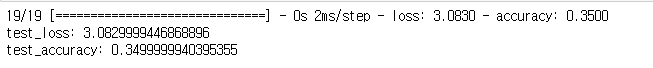
⇒ 학습 정확도는 늘어도 test 정확도에서 훨신 떨어졌다.
단순히 학습 횟수만 늘려선 좋은 결과는 얻기 힘든것 같다. 학습 데이터를 늘려보자.

### 2. 학습 데이터 늘리기 + 파라미터 변경하기 + 반복학습 
1. 기존 300장의 데이터로만 학습하면, 다양한 데이터를 학습할 수 없을 것 같아, 팀원 분들이 노션에 올려주신 데이터를 가져와 각 카테고리별로 1000개씩 늘려, 총 3300장의 데이터를 학습시켰다.
2. 기존 셋팅 되어있던 파라미터를 하나하나 바꿔서 하기 보단 올려놓고 조금씩 조정 하는게 좋다는 팀원분께 들어, 이미지 특징 수, 뉴런의 숫자를 각각 32, 64, 64 만큼 올려서 학습 해 보았다.
3. 반복학습 : 사람도 하나만 보고 외울 수 없듯, 모델도 여러번 반복 학습이 필요하다 생각해, 학습하고 테스트 해보는 과정을 여러번 반복하였다. 

그 결과,

* 학습 정확도 
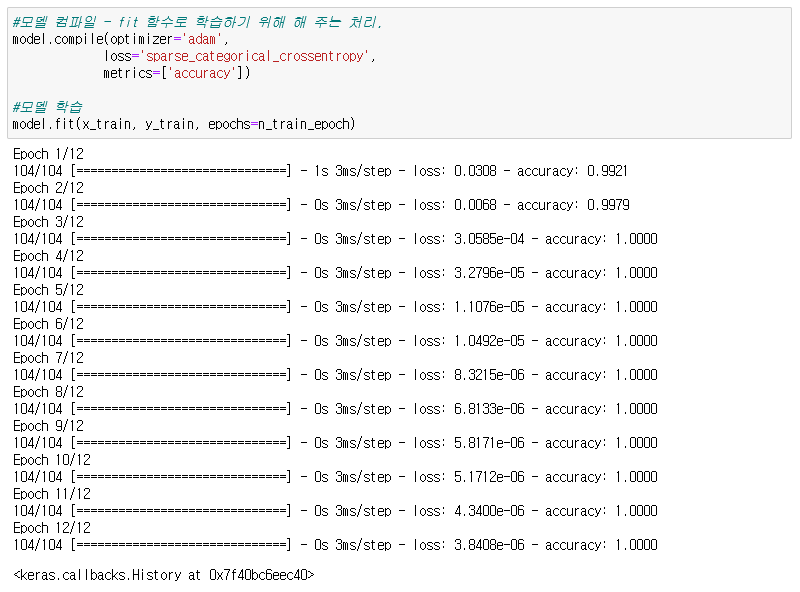

* test 정확도 
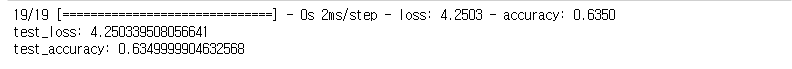

* 63%까지 늘어났다..!!

# 후기 

* 이번 EXP.1에선 손 이미지를 직접 만들어서 모델을 학습시켜보고, 학습 된 모델을 검증까지 시켜볼 수 있던 시간이였다. 처음 접한 부분이 많아 어려운 부분 도 많았지만, 1기 팀원분들과 함께 상의하고, 안되는 부분은 공유하고 함께 풀어나갈 수 있는 귀중한 시간이였다. 아직은 도움만 받는 정도지만, 지금처럼 열심히 공부해서 점차 있을 프로젝트에선 도움을 드릴 수 있는 팀원이 될 수 있었음 좋겠다. 

* 프로젝트를 하면서 가장 어려웠던 점은 정확도가 60% 이상으로 넘어가지 않았던 점이였다. 마냥 학습 데이터만 늘린다 해서 모델이 학습을 잘 했던것도 아니였고, 파라미터 값 하나씩만 바꾼다 해서 모델 학습에 도움이 되었던것도 아니였다. 많은 학습량과 적절한 파라미터의 하모니가 있어야만, 모델 학습이 원활하다는 사실을 알게되었다. 

* 사실, 지금 이 EXP1을 적는건 EXP2 노드를 학습 한 후에 시작하게 되었는데, 그냥 EXP1 내용만 보고 했을 때 보다 조금은 어떤식으로 해야할지 흐름이 보이는것 같았다. 처음 EXP 이론만 보고, 바로 프로젝트를 하려니 일단 먼저 막막했고, 어떻게 해야할 지 모르겠단 생각에 휩싸여 간단하게 숫자 하나만 바꿔주면 될 문제도 해결을 못해 1시간 이상 고민했었었다. 다양한 노드를 진행하고, 풀잎스쿨에서 기초를 다져, 다시 돌아오고보니 엄청 많이 쉬워진건 아니였지만, 그래도 그래도 '아..! 이거구나' 하는게 보여서 기뻣던것 같다.

* 힘내서 내일도 열심히 배워나가야겠다.  많이 배워서 못봤던 더 많은 것들이 보이게 되는 날이 오길:D 